# Machine learning application of predictive modelling for short-term large index movement.
I will analyze the historical movement of large indices and attempt to link a model to the movement of the S&P 500. 
The indices used are all very large, popularly traded indices, which are widely used for many retirement funds, IRAs, mutual funds etc. 


Indices used: VEA VWO VO VB VV, respectively. Each index will have 6 years of historical prices and '' daily change. 
The target index is VOO. This is a commonly used S&P 500 ETF by Vanguard. 
All indices used are Vanguard. 


This model will attempt to predict movement of VOO given historical movement of the 5 indices.
Initiall the model will attempt to classify data by whether the movement of VOO is positive or negative, later attempting to predict exact daily movement to 0.1%

In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
test_inputs = pd.read_csv('Stockdaily%changeraw.csv', delimiter=',')
test_inputs = np.asarray(test_inputs)
test_inputs

import warnings
warnings.filterwarnings('ignore')

In [158]:
X = test_inputs[:,15:20] #data 
Y = test_inputs[:,21] #target
X=X.astype('float')
Y=Y.astype('float')

print(X)


[[-0.00155  0.00371  0.00399 -0.00111 -0.00094]
 [-0.00449 -0.00635 -0.00175 -0.00406 -0.00468]
 [ 0.00046 -0.00246  0.00224  0.00171 -0.00046]
 ...
 [-0.00119 -0.00086 -0.0025  -0.00078  0.00025]
 [-0.00716 -0.007   -0.00817 -0.00483 -0.00177]
 [ 0.00326  0.00073  0.00436  0.00166  0.00516]]


# The data is rounded to quantize the movement of each index to 0.1% 
A value of 5 will correspond to 0.5% movement upwards etc.

In [172]:

X_d = np.array(np.round(X*1000,decimals=0))
Y_d = np.array(np.round(Y*1000,decimals=0))

X_d=X_d.astype('int')
Y_d=Y_d.astype('int')
Y_d[Y_d >=0]=1
Y_d[Y_d <0]=0
print(Y_d)


[0 0 1 ... 0 0 1]


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_d, Y_d)

In [174]:
len(X_d),len(X_train),len(X_test)

(1510, 1132, 378)

In [175]:
estimator = KNeighborsClassifier(n_neighbors=40)

In [176]:
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=40, p=2,
           weights='uniform')

In [177]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 91.5%


In [178]:
scores = cross_val_score(estimator, X_d, Y_d, scoring = 'accuracy')
average_accuracy = np.mean(scores)*100
print("The accuracy is {0:.1f}%".format(average_accuracy))


The accuracy is 89.5%


# Accuracy of predicting corresponding, concurrent price of S&P given daily prices of popular indices.
The accuracy of the model is superb, however not to be mislead this model predicts whether or not the S&P moved upwards or downwards given the movement of other indices. This could imply that most market indices have clear correlations between price movements and trends. If one index trends upwards while another moves downwards, or vice-versa, it appears to consistently follow this pattern. Although overall price evolution is chaotic, correlation and covariance appears to be linked. However, this is only implied for very large, low variance, uniformly distributed indices, not soley equities. 

In [183]:
avg_scores = []
all_scores = []
parameters = list(range(1,20))
for n_neighbors in parameters:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X_d, Y_d, scoring = 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

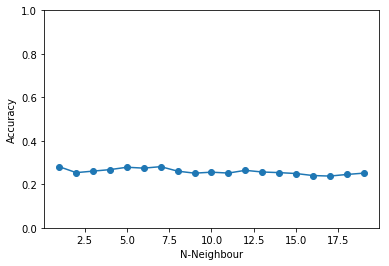

0.28124147021823237


In [184]:

import matplotlib.pyplot as plt
plt.plot(parameters, avg_scores, '-o')
plt.xlabel('N-Neighbour')
plt.ylabel('Accuracy')
plt.ylim([0,1])

plt.show()
print(np.max(avg_scores))

# Exact value prediction
Now the I will run the machine learning process with the predictive values of the S&P 500 being exact values, instead of only the direction of movement.

The estimator will now run with classifications of all of the possible historical values for daily movement. There are 50 unique classifications for the model now. 

The unique values for classification are shown below, along with the minimum and maximum daily movement of the S&P500.
All values are still given in 0.1% units. i.e.  a classification of 6 corresponds to a 0.6% daily movement, - 5 is -0.5% movement etc.


In [185]:
print("Largest negative movement:",min(Y_d))
print("Largest positive movement:" ,max(Y_d))
output = set()
for x in Y_d:
    output.add(x)
print("All possible classifications:", output)
print("Number of unique classifications in 0.1% =" , len(output))

Largest negative movement: -36
Largest positive movement: 42
All possible classifications: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 30, 34, 38, 42, -8, -36, -27, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -1, -7, -6, -5, -4, -3, -2}
Number of unique classifications in 0.1% = 50


In [186]:

X_d = np.array(np.round(X*1000,decimals=0))
Y_d = np.array(np.round(Y*1000,decimals=0))

X_d=X_d.astype('int')
Y_d=Y_d.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X_d, Y_d)
estimator.fit(X_train, y_train)
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))

scores = cross_val_score(estimator, X_d, Y_d, scoring = 'accuracy')
average_accuracy = np.mean(scores)*100
print("The accuracy is {0:.1f}%".format(average_accuracy))

The accuracy is 26.2%
The accuracy is 25.1%


# The accuracy of the stricter model

Naively an accuracy of 26.2%, 22.9% for the new model appears to be very poor, however the model is now attempting to predict correct daily movement of the S&P500 to 0.1%, choosing from 50 distinct classifications. Randomly a model would stastically predict the correct movement with only 2% accuracy, this is in actuality incredible accuracy

# What is this useful for?
What is the purpose of predicting specific daily movement of the S&P 500 to a tenth of a %? 
Well, stock options are a primary, clear choice. Based off of specific target prices, knowledge of short-term price movements of a large, low volatility index, such as the S&P, can be incredibly useful. Option contract are incredibly cheap with short time expiration, along with an index which is very low volatility, if a model can be created to reach specific price targets within a few days, then prediction of the exact 0.1% -0.2% movement can reap incredible profit.

In [ ]:
test_inputs = pd.read_csv(' ', delimiter=',')